# Weather Trends

## Join Database tables

- `city_data`
- `global_data`

### <h3 align="center" id="heading">Data Model</h3>
| year | country | city | avg_temp_city | avg_temp_global |
|------|---------|------|---------------|-----------------|
| INT  | CHAR    | CHAR | ENUM          | ENUM            |

```sql
-- RENAME column name from global_data, city_data
ALTER TABLE city_data
RENAME COLUMN avg_temp TO avg_temp_city;
ALTER TABLE global_data
RENAME COLUMN avg_temp TO avg_temp_global;

-- INNER JOIN global_data and city_data tables
SELECT city_data.year, city_data.country, city_data.city, city_data.avg_temp_city, global_data.avg_temp_global
FROM city_data
INNER JOIN global_data ON city_data.year=global_data.year ORDER BY city_data.year, city_data.country, city_data.city;
```


## 1. Import Libraries
To load new `pip` package from https://pypi.org, run the following line. `!pip install <package_name>`. You need to validate packages. Otherwise your environment may be infected with a virus. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 2. Extract
I used pandas with `read_csv` function to extract csv to dataframe. Prefered to plot with `matplotlib`
* **cum_sum**: Cumulative summary of global temperature
* **count**: Indicates to nr. of years
* **mov_avg**: Moving average or rolling mean 

In [2]:
df = pd.read_csv("data/dataset.csv")
df

,year,country,city,avg_temp_city,avg_temp_global
0,1750,Albania,Tirana,15.91,8.72
1,1750,Austria,Vienna,8.86,8.72
2,1750,Belarus,Minsk,6.28,8.72
3,1750,Belgium,Brussels,10.73,8.72
4,1750,Bosnia And Herzegovina,Sarajevo,9.70,8.72
...,...,...,...,...,...
70234,2013,Venezuela,Valencia,26.60,9.61
70235,2013,Vietnam,Hanoi,23.10,9.61
70236,2013,Vietnam,Ho Chi Minh City,28.46,9.61
70237,2013,Zambia,Lusaka,20.14,9.61


## 3. Exploration

### City filtered by Amsterdam 

In [3]:
city_name = "Amsterdam"
df_ams = df.loc[df['city'] == city_name]

In [4]:
df_ams

,year,country,city,avg_temp_city,avg_temp_global
29,1750,Netherlands,Amsterdam,10.04,8.72
108,1751,Netherlands,Amsterdam,9.63,7.98
187,1752,Netherlands,Amsterdam,5.97,5.78
271,1753,Netherlands,Amsterdam,9.08,8.39
357,1754,Netherlands,Amsterdam,8.72,8.47
...,...,...,...,...,...
68726,2009,Netherlands,Amsterdam,10.33,9.51
69068,2010,Netherlands,Amsterdam,8.84,9.70
69410,2011,Netherlands,Amsterdam,10.73,9.52
69752,2012,Netherlands,Amsterdam,10.08,9.51


### Moving Average

In [5]:
year = df_ams['year']
global_temp_ma =  df_ams['avg_temp_global'].rolling(7).mean()
ams_temp_ma =  df_ams['avg_temp_city'].rolling(7).mean()

df_ams = df_ams.assign(ma_global = global_temp_ma.values, ma_amsterdam = ams_temp_ma.values)

In [6]:
df_ams

,year,country,city,avg_temp_city,avg_temp_global,ma_global,ma_amsterdam
29,1750,Netherlands,Amsterdam,10.04,8.72,NaN,NaN
108,1751,Netherlands,Amsterdam,9.63,7.98,NaN,NaN
187,1752,Netherlands,Amsterdam,5.97,5.78,NaN,NaN
271,1753,Netherlands,Amsterdam,9.08,8.39,NaN,NaN
357,1754,Netherlands,Amsterdam,8.72,8.47,NaN,NaN
...,...,...,...,...,...,...,...
68726,2009,Netherlands,Amsterdam,10.33,9.51,9.535714,10.541429
69068,2010,Netherlands,Amsterdam,8.84,9.70,9.560000,10.335714
69410,2011,Netherlands,Amsterdam,10.73,9.52,9.588571,10.401429
69752,2012,Netherlands,Amsterdam,10.08,9.51,9.561429,10.344286


## 4. Visualisation

Definition of done...

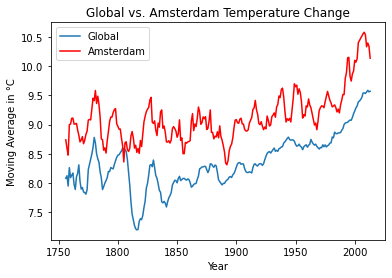

In [7]:
plt.plot(year, global_temp_ma, label="Global")
plt.plot(year, ams_temp_ma, label="Amsterdam", color="red")
plt.legend()
plt.title( 'Global vs. Amsterdam Temperature Change')
plt.xlabel ('Year')
plt.ylabel('Moving Average in °C')
plt.show()

The graph shows the moving average of temperature changes in globe and Amsterdam, between 1750 and 2000. 
According to the graph, the years 1750 to 1800 saw the MA of temperatures in globe and Amsterdam increase and decrease by approximately the same directions.
However, when global MAs reflect an overall increasing trend expect for middle 1800s, Amsterdam MAs has quick and sharp up and downs compared to global ones. 
Also, it’s clearly seen that in Amsterdam, MA of temperatures are always above the global rates expect for the early 1800s. So that, Amsterdam is hotter compared to the global average. 
As overall, the world consistently getting hotter since the late 1850s.

In [8]:
city_name = "Berlin"
df_berlin = df.loc[df['city'] == city_name]

In [9]:
df_berlin

,year,country,city,avg_temp_city,avg_temp_global
17,1750,Germany,Berlin,9.83,8.72
96,1751,Germany,Berlin,9.75,7.98
175,1752,Germany,Berlin,4.84,5.78
255,1753,Germany,Berlin,8.72,8.39
341,1754,Germany,Berlin,8.49,8.47
...,...,...,...,...,...
68637,2009,Germany,Berlin,10.06,9.51
68979,2010,Germany,Berlin,8.61,9.70
69321,2011,Germany,Berlin,10.56,9.52
69663,2012,Germany,Berlin,9.96,9.51


In [10]:
year = df_berlin['year']
global_temp_ma =  df_berlin['avg_temp_global'].rolling(7).mean()
berlin_temp_ma =  df_berlin['avg_temp_city'].rolling(7).mean()

df_berlin = df_berlin.assign(ma_global = global_temp_ma.values, ma_berlin = berlin_temp_ma.values)

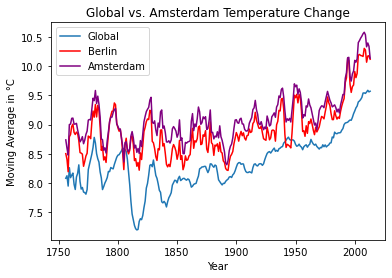

In [11]:
plt.plot(year, global_temp_ma, label="Global")
plt.plot(year, berlin_temp_ma, label="Berlin", color="red")
plt.plot(year, ams_temp_ma, label="Amsterdam", color="purple")
plt.legend()
plt.title( 'Global vs. Amsterdam Temperature Change')
plt.xlabel ('Year')
plt.ylabel('Moving Average in °C')
plt.show()

In [12]:
city_name = "Paris"
df_paris = df.loc[df['city'] == city_name]

In [13]:
df_paris

,year,country,city,avg_temp_city,avg_temp_global
16,1750,France,Paris,11.18,8.72
95,1751,France,Paris,11.15,7.98
174,1752,France,Paris,6.97,5.78
254,1753,France,Paris,10.40,8.39
340,1754,France,Paris,10.15,8.47
...,...,...,...,...,...
68634,2009,France,Paris,11.46,9.51
68976,2010,France,Paris,10.41,9.70
69318,2011,France,Paris,12.33,9.52
69660,2012,France,Paris,11.22,9.51


In [14]:
year = df_paris['year']
global_temp_ma =  df_paris['avg_temp_global'].rolling(7).mean()
paris_temp_ma =  df_paris['avg_temp_city'].rolling(7).mean()

df_paris =df_paris.assign(ma_global = global_temp_ma.values, ma_paris = paris_temp_ma.values)

In [15]:
df_paris

,year,country,city,avg_temp_city,avg_temp_global,ma_global,ma_paris
16,1750,France,Paris,11.18,8.72,NaN,NaN
95,1751,France,Paris,11.15,7.98,NaN,NaN
174,1752,France,Paris,6.97,5.78,NaN,NaN
254,1753,France,Paris,10.40,8.39,NaN,NaN
340,1754,France,Paris,10.15,8.47,NaN,NaN
...,...,...,...,...,...,...,...
68634,2009,France,Paris,11.46,9.51,9.535714,11.582857
68976,2010,France,Paris,10.41,9.70,9.560000,11.368571
69318,2011,France,Paris,12.33,9.52,9.588571,11.510000
69660,2012,France,Paris,11.22,9.51,9.561429,11.462857


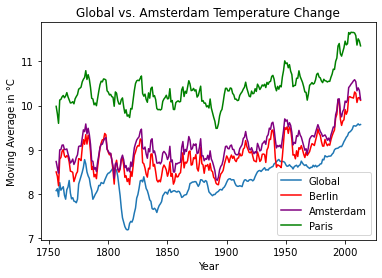

In [16]:
plt.plot(year, global_temp_ma, label="Global")
plt.plot(year, berlin_temp_ma, label="Berlin", color="red")
plt.plot(year, ams_temp_ma, label="Amsterdam", color="purple")
plt.plot(year, paris_temp_ma, label="Paris", color="green")
plt.legend()
plt.title( 'Global vs. Amsterdam Temperature Change')
plt.xlabel ('Year')
plt.ylabel('Moving Average in °C')
plt.show()

In [17]:
city_name = "Istanbul"
df_istanbul = df.loc[df['city'] == city_name]

In [18]:
df_istanbul

,year,country,city,avg_temp_city,avg_temp_global
50,1750,Turkey,Istanbul,13.83,8.72
129,1751,Turkey,Istanbul,14.14,7.98
208,1752,Turkey,Istanbul,9.48,5.78
293,1753,Turkey,Istanbul,13.42,8.39
379,1754,Turkey,Istanbul,13.58,8.47
...,...,...,...,...,...
68798,2009,Turkey,Istanbul,14.95,9.51
69140,2010,Turkey,Istanbul,15.60,9.70
69482,2011,Turkey,Istanbul,13.65,9.52
69824,2012,Turkey,Istanbul,14.97,9.51


In [19]:
year = df_istanbul['year']
global_temp_ma = df_istanbul['avg_temp_global'].rolling(7).mean()
istanbul_temp_ma = df_istanbul['avg_temp_city'].rolling(7).mean()
df_istanbul = df_istanbul.assign(ma_global = global_temp_ma.values, ma_istanbul = istanbul_temp_ma.values)

,year,country,city,avg_temp_city,avg_temp_global,ma_global,ma_istanbul
50,1750,Turkey,Istanbul,13.83,8.72,NaN,NaN
129,1751,Turkey,Istanbul,14.14,7.98,NaN,NaN
208,1752,Turkey,Istanbul,9.48,5.78,NaN,NaN
293,1753,Turkey,Istanbul,13.42,8.39,NaN,NaN
379,1754,Turkey,Istanbul,13.58,8.47,NaN,NaN
...,...,...,...,...,...,...,...
68798,2009,Turkey,Istanbul,14.95,9.51,9.535714,14.474286
69140,2010,Turkey,Istanbul,15.60,9.70,9.560000,14.715714
69482,2011,Turkey,Istanbul,13.65,9.52,9.588571,14.632857
69824,2012,Turkey,Istanbul,14.97,9.51,9.561429,14.738571


In [20]:
df_istanbul

,year,country,city,avg_temp_city,avg_temp_global
50,1750,Turkey,Istanbul,13.83,8.72
129,1751,Turkey,Istanbul,14.14,7.98
208,1752,Turkey,Istanbul,9.48,5.78
293,1753,Turkey,Istanbul,13.42,8.39
379,1754,Turkey,Istanbul,13.58,8.47
...,...,...,...,...,...
68798,2009,Turkey,Istanbul,14.95,9.51
69140,2010,Turkey,Istanbul,15.60,9.70
69482,2011,Turkey,Istanbul,13.65,9.52
69824,2012,Turkey,Istanbul,14.97,9.51


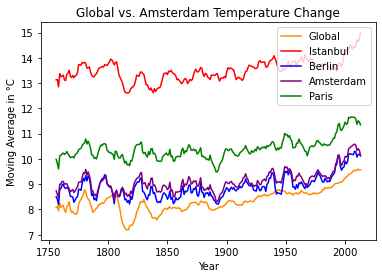

In [25]:
plt.plot(year, global_temp_ma, label="Global", color="darkorange")
plt.plot(year, istanbul_temp_ma, label="Istanbul", color="red")
plt.plot(year, berlin_temp_ma, label="Berlin", color="blue")
plt.plot(year, ams_temp_ma, label="Amsterdam", color="purple")
plt.plot(year, paris_temp_ma, label="Paris", color="green")
plt.legend()
plt.title( 'Global vs. Amsterdam Temperature Change')
plt.xlabel ('Year')
plt.ylabel('Moving Average in °C')
plt.show()